# Control computer with hand gestures

# Making the model

The following lines describe the creation of a model that detect some gestures through the camera to do some actions in the computer.

The model is a Convolutional Neural Network make it with Keras.

This work was made it like final project of [Ironhack](https://www.ironhack.com), an intensive 9-week bootcamp of data analytics.

# Code

First of all, we need to import all the libraries used it in the project.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def plot_image_sample(X, y, n_rows, n_cols):
    
    fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(10, 10))
    sample = np.random.choice(X.shape[0], n_rows * n_cols)
    
    for row in range(n_rows):
        for col in range(n_cols):
            sample_element = sample[n_cols * row + col]
            sample_label = y[sample_element]
            axes[row, col].imshow(np.squeeze(X[sample_element], axis=2), cmap='gray')
            axes[row, col].set_title(sample_label)
            axes[row, col].get_xaxis().set_ticks([])
            axes[row, col].get_yaxis().set_ticks([])
    plt.tight_layout()
    plt.show()

We charge the path of all the raw images (download it from a dataset of kaggle). We have 4 gestures: fist, ok, peace and C and negatives images (images where there are not hands).

In [3]:
myFolder = "images/00-images-raw"
imagepaths = set() 

for root, dirs, files in os.walk(myFolder):
    for fileName in files:
        imagepaths.add( os.path.join( root[len(myFolder):], fileName ))

In [4]:
len(imagepaths)

15000

We read the images with **opencv**.

In [5]:
X = [] # Image data
y = [] # Labels 0--> fist, 1--> ok, 2--> peace, 3--> C, 4--> nothing
for path in imagepaths:
    img = cv2.imread(myFolder + path, cv2.COLOR_BGR2GRAY) # Reads image and returns np.array
    X.append(img)

    # Processing label in image path
    category = path.split("/")[1]
    label = int(category[1])
    y.append(label) 

In [6]:
len(X)

15000

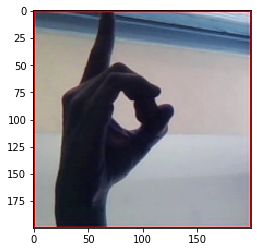

In [7]:
plt.imshow(X[12])

To create a prediction model more solid, we are going to simplificate the images. We need to binarize it: Make the hand white and the background, black.

First of all, we apply a cv2.floodFill to the images to do white the main:

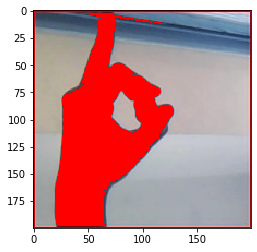

In [8]:
connectivity = 4
flags = connectivity
flags |= cv2.FLOODFILL_FIXED_RANGE
tolerancia = 50
width = X[12].shape[1]
height = X[12].shape[0]

test_image = cv2.floodFill(X[12].copy(), None, (height//2, width//2), (255), (tolerancia,) * 3, (tolerancia,) * 3, flags)

plt.imshow(test_image[1])

Finally, we make a threshold to binarize the photo.

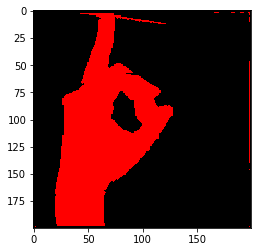

In [9]:
test_image = cv2.threshold(test_image[1],254,255,cv2.THRESH_BINARY)

plt.imshow(test_image[1])

We make this for all the photos grouping in one cell of code

In [10]:
X = []
y = []


connectivity = 4
flags = connectivity
flags |= cv2.FLOODFILL_FIXED_RANGE
tolerancia = 50

def process_image(path):
    new_image = cv2.imread(myFolder + path)
       
    width = new_image.shape[1]
    height = new_image.shape[0]

    new_image = cv2.floodFill(new_image, None, (height//2, width//2), (255), (tolerancia,) * 3, (tolerancia,) * 3, flags)
    
    new_image=cv2.threshold(new_image[1],254,255,cv2.THRESH_BINARY)

    return new_image[1][:,:,0]

for path in imagepaths:
    X.append(process_image(path))

    category = path.split("/")[1]
    label = int(category[0])
    y.append(label)

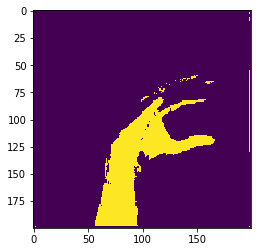

In [11]:
plt.imshow(X[0])

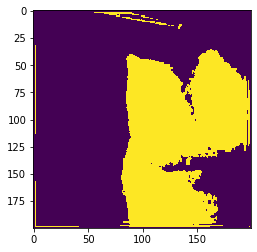

In [12]:
plt.imshow(X[4])

The filter to binarize the photos is applied according the color just in the center pixel. So all the photos where the hand is not in the center are badly binarized. For this reason, we have saved all the black and white photos in a new folder and we have selected **manually** al the good photos.

Finally, we have selected a **dataset with 500 black and white photos for each gesture**.

In [13]:
images_binarized_path = ["00-fist", "11-ok","22-peace", "33-C", "44-nothing"]

for pic in range(len(X)):
    writeStatus =  cv2.imwrite( "images/01-images-binarized/"+ images_binarized_path[y[pic]] + \
                               "/Binary_Image_"+str(pic)+".jpg", X[pic] )
    if writeStatus is True:
        print("Guardada la foto " + str(pic) + " en " + images_binarized_path[y[pic]])
    else:
        print("Problemas al guardar la foto " + str(pic) + " en " + images_binarized_path[y[pic]])

Guardada la foto 0 en 33-C
Guardada la foto 1 en 33-C
Guardada la foto 2 en 11-ok
Guardada la foto 3 en 11-ok
Guardada la foto 4 en 22-peace
Guardada la foto 5 en 44-nothing
Guardada la foto 6 en 11-ok
Guardada la foto 7 en 11-ok
Guardada la foto 8 en 33-C
Guardada la foto 9 en 22-peace
Guardada la foto 10 en 22-peace
Guardada la foto 11 en 22-peace
Guardada la foto 12 en 11-ok
Guardada la foto 13 en 00-fist
Guardada la foto 14 en 33-C
Guardada la foto 15 en 11-ok
Guardada la foto 16 en 00-fist
Guardada la foto 17 en 22-peace
Guardada la foto 18 en 44-nothing
Guardada la foto 19 en 11-ok
Guardada la foto 20 en 33-C
Guardada la foto 21 en 11-ok
Guardada la foto 22 en 22-peace
Guardada la foto 23 en 00-fist
Guardada la foto 24 en 11-ok
Guardada la foto 25 en 22-peace
Guardada la foto 26 en 11-ok
Guardada la foto 27 en 00-fist
Guardada la foto 28 en 44-nothing
Guardada la foto 29 en 33-C
Guardada la foto 30 en 44-nothing
Guardada la foto 31 en 44-nothing
Guardada la foto 32 en 22-peace
Gu

Guardada la foto 458 en 00-fist
Guardada la foto 459 en 33-C
Guardada la foto 460 en 33-C
Guardada la foto 461 en 11-ok
Guardada la foto 462 en 22-peace
Guardada la foto 463 en 44-nothing
Guardada la foto 464 en 33-C
Guardada la foto 465 en 33-C
Guardada la foto 466 en 00-fist
Guardada la foto 467 en 00-fist
Guardada la foto 468 en 00-fist
Guardada la foto 469 en 11-ok
Guardada la foto 470 en 00-fist
Guardada la foto 471 en 22-peace
Guardada la foto 472 en 00-fist
Guardada la foto 473 en 22-peace
Guardada la foto 474 en 11-ok
Guardada la foto 475 en 44-nothing
Guardada la foto 476 en 33-C
Guardada la foto 477 en 00-fist
Guardada la foto 478 en 22-peace
Guardada la foto 479 en 44-nothing
Guardada la foto 480 en 11-ok
Guardada la foto 481 en 11-ok
Guardada la foto 482 en 11-ok
Guardada la foto 483 en 11-ok
Guardada la foto 484 en 22-peace
Guardada la foto 485 en 33-C
Guardada la foto 486 en 11-ok
Guardada la foto 487 en 22-peace
Guardada la foto 488 en 00-fist
Guardada la foto 489 en 00-

Guardada la foto 991 en 22-peace
Guardada la foto 992 en 44-nothing
Guardada la foto 993 en 44-nothing
Guardada la foto 994 en 44-nothing
Guardada la foto 995 en 00-fist
Guardada la foto 996 en 44-nothing
Guardada la foto 997 en 11-ok
Guardada la foto 998 en 33-C
Guardada la foto 999 en 22-peace
Guardada la foto 1000 en 33-C
Guardada la foto 1001 en 00-fist
Guardada la foto 1002 en 22-peace
Guardada la foto 1003 en 00-fist
Guardada la foto 1004 en 44-nothing
Guardada la foto 1005 en 22-peace
Guardada la foto 1006 en 44-nothing
Guardada la foto 1007 en 00-fist
Guardada la foto 1008 en 00-fist
Guardada la foto 1009 en 00-fist
Guardada la foto 1010 en 22-peace
Guardada la foto 1011 en 44-nothing
Guardada la foto 1012 en 44-nothing
Guardada la foto 1013 en 00-fist
Guardada la foto 1014 en 44-nothing
Guardada la foto 1015 en 11-ok
Guardada la foto 1016 en 00-fist
Guardada la foto 1017 en 33-C
Guardada la foto 1018 en 44-nothing
Guardada la foto 1019 en 00-fist
Guardada la foto 1020 en 33-C


Guardada la foto 1638 en 00-fist
Guardada la foto 1639 en 22-peace
Guardada la foto 1640 en 11-ok
Guardada la foto 1641 en 33-C
Guardada la foto 1642 en 22-peace
Guardada la foto 1643 en 22-peace
Guardada la foto 1644 en 22-peace
Guardada la foto 1645 en 44-nothing
Guardada la foto 1646 en 33-C
Guardada la foto 1647 en 11-ok
Guardada la foto 1648 en 00-fist
Guardada la foto 1649 en 22-peace
Guardada la foto 1650 en 11-ok
Guardada la foto 1651 en 00-fist
Guardada la foto 1652 en 00-fist
Guardada la foto 1653 en 22-peace
Guardada la foto 1654 en 33-C
Guardada la foto 1655 en 11-ok
Guardada la foto 1656 en 11-ok
Guardada la foto 1657 en 00-fist
Guardada la foto 1658 en 22-peace
Guardada la foto 1659 en 44-nothing
Guardada la foto 1660 en 11-ok
Guardada la foto 1661 en 11-ok
Guardada la foto 1662 en 44-nothing
Guardada la foto 1663 en 33-C
Guardada la foto 1664 en 00-fist
Guardada la foto 1665 en 22-peace
Guardada la foto 1666 en 00-fist
Guardada la foto 1667 en 22-peace
Guardada la foto 1

Guardada la foto 2241 en 00-fist
Guardada la foto 2242 en 11-ok
Guardada la foto 2243 en 33-C
Guardada la foto 2244 en 00-fist
Guardada la foto 2245 en 00-fist
Guardada la foto 2246 en 11-ok
Guardada la foto 2247 en 22-peace
Guardada la foto 2248 en 22-peace
Guardada la foto 2249 en 11-ok
Guardada la foto 2250 en 33-C
Guardada la foto 2251 en 00-fist
Guardada la foto 2252 en 44-nothing
Guardada la foto 2253 en 11-ok
Guardada la foto 2254 en 00-fist
Guardada la foto 2255 en 11-ok
Guardada la foto 2256 en 11-ok
Guardada la foto 2257 en 11-ok
Guardada la foto 2258 en 00-fist
Guardada la foto 2259 en 00-fist
Guardada la foto 2260 en 44-nothing
Guardada la foto 2261 en 11-ok
Guardada la foto 2262 en 11-ok
Guardada la foto 2263 en 22-peace
Guardada la foto 2264 en 44-nothing
Guardada la foto 2265 en 22-peace
Guardada la foto 2266 en 11-ok
Guardada la foto 2267 en 11-ok
Guardada la foto 2268 en 22-peace
Guardada la foto 2269 en 44-nothing
Guardada la foto 2270 en 44-nothing
Guardada la foto 2

Guardada la foto 2903 en 33-C
Guardada la foto 2904 en 33-C
Guardada la foto 2905 en 11-ok
Guardada la foto 2906 en 11-ok
Guardada la foto 2907 en 44-nothing
Guardada la foto 2908 en 11-ok
Guardada la foto 2909 en 33-C
Guardada la foto 2910 en 22-peace
Guardada la foto 2911 en 44-nothing
Guardada la foto 2912 en 22-peace
Guardada la foto 2913 en 00-fist
Guardada la foto 2914 en 11-ok
Guardada la foto 2915 en 00-fist
Guardada la foto 2916 en 44-nothing
Guardada la foto 2917 en 44-nothing
Guardada la foto 2918 en 22-peace
Guardada la foto 2919 en 00-fist
Guardada la foto 2920 en 22-peace
Guardada la foto 2921 en 44-nothing
Guardada la foto 2922 en 00-fist
Guardada la foto 2923 en 44-nothing
Guardada la foto 2924 en 44-nothing
Guardada la foto 2925 en 11-ok
Guardada la foto 2926 en 00-fist
Guardada la foto 2927 en 33-C
Guardada la foto 2928 en 44-nothing
Guardada la foto 2929 en 33-C
Guardada la foto 2930 en 44-nothing
Guardada la foto 2931 en 11-ok
Guardada la foto 2932 en 33-C
Guardada 

Guardada la foto 3583 en 22-peace
Guardada la foto 3584 en 00-fist
Guardada la foto 3585 en 00-fist
Guardada la foto 3586 en 11-ok
Guardada la foto 3587 en 11-ok
Guardada la foto 3588 en 44-nothing
Guardada la foto 3589 en 11-ok
Guardada la foto 3590 en 22-peace
Guardada la foto 3591 en 00-fist
Guardada la foto 3592 en 00-fist
Guardada la foto 3593 en 44-nothing
Guardada la foto 3594 en 11-ok
Guardada la foto 3595 en 00-fist
Guardada la foto 3596 en 11-ok
Guardada la foto 3597 en 44-nothing
Guardada la foto 3598 en 33-C
Guardada la foto 3599 en 11-ok
Guardada la foto 3600 en 33-C
Guardada la foto 3601 en 11-ok
Guardada la foto 3602 en 00-fist
Guardada la foto 3603 en 00-fist
Guardada la foto 3604 en 00-fist
Guardada la foto 3605 en 44-nothing
Guardada la foto 3606 en 22-peace
Guardada la foto 3607 en 22-peace
Guardada la foto 3608 en 11-ok
Guardada la foto 3609 en 00-fist
Guardada la foto 3610 en 11-ok
Guardada la foto 3611 en 44-nothing
Guardada la foto 3612 en 00-fist
Guardada la fot

Guardada la foto 4253 en 33-C
Guardada la foto 4254 en 44-nothing
Guardada la foto 4255 en 11-ok
Guardada la foto 4256 en 11-ok
Guardada la foto 4257 en 11-ok
Guardada la foto 4258 en 44-nothing
Guardada la foto 4259 en 22-peace
Guardada la foto 4260 en 44-nothing
Guardada la foto 4261 en 11-ok
Guardada la foto 4262 en 33-C
Guardada la foto 4263 en 11-ok
Guardada la foto 4264 en 11-ok
Guardada la foto 4265 en 22-peace
Guardada la foto 4266 en 33-C
Guardada la foto 4267 en 33-C
Guardada la foto 4268 en 44-nothing
Guardada la foto 4269 en 44-nothing
Guardada la foto 4270 en 11-ok
Guardada la foto 4271 en 11-ok
Guardada la foto 4272 en 00-fist
Guardada la foto 4273 en 22-peace
Guardada la foto 4274 en 22-peace
Guardada la foto 4275 en 33-C
Guardada la foto 4276 en 22-peace
Guardada la foto 4277 en 33-C
Guardada la foto 4278 en 33-C
Guardada la foto 4279 en 33-C
Guardada la foto 4280 en 33-C
Guardada la foto 4281 en 00-fist
Guardada la foto 4282 en 33-C
Guardada la foto 4283 en 33-C
Guarda

Guardada la foto 4891 en 00-fist
Guardada la foto 4892 en 00-fist
Guardada la foto 4893 en 22-peace
Guardada la foto 4894 en 33-C
Guardada la foto 4895 en 44-nothing
Guardada la foto 4896 en 33-C
Guardada la foto 4897 en 22-peace
Guardada la foto 4898 en 00-fist
Guardada la foto 4899 en 33-C
Guardada la foto 4900 en 11-ok
Guardada la foto 4901 en 33-C
Guardada la foto 4902 en 33-C
Guardada la foto 4903 en 22-peace
Guardada la foto 4904 en 44-nothing
Guardada la foto 4905 en 44-nothing
Guardada la foto 4906 en 00-fist
Guardada la foto 4907 en 44-nothing
Guardada la foto 4908 en 11-ok
Guardada la foto 4909 en 11-ok
Guardada la foto 4910 en 22-peace
Guardada la foto 4911 en 33-C
Guardada la foto 4912 en 00-fist
Guardada la foto 4913 en 44-nothing
Guardada la foto 4914 en 33-C
Guardada la foto 4915 en 33-C
Guardada la foto 4916 en 22-peace
Guardada la foto 4917 en 22-peace
Guardada la foto 4918 en 33-C
Guardada la foto 4919 en 44-nothing
Guardada la foto 4920 en 11-ok
Guardada la foto 4921

Guardada la foto 5640 en 44-nothing
Guardada la foto 5641 en 44-nothing
Guardada la foto 5642 en 00-fist
Guardada la foto 5643 en 33-C
Guardada la foto 5644 en 22-peace
Guardada la foto 5645 en 11-ok
Guardada la foto 5646 en 11-ok
Guardada la foto 5647 en 22-peace
Guardada la foto 5648 en 00-fist
Guardada la foto 5649 en 33-C
Guardada la foto 5650 en 00-fist
Guardada la foto 5651 en 44-nothing
Guardada la foto 5652 en 33-C
Guardada la foto 5653 en 22-peace
Guardada la foto 5654 en 44-nothing
Guardada la foto 5655 en 44-nothing
Guardada la foto 5656 en 11-ok
Guardada la foto 5657 en 11-ok
Guardada la foto 5658 en 11-ok
Guardada la foto 5659 en 33-C
Guardada la foto 5660 en 11-ok
Guardada la foto 5661 en 11-ok
Guardada la foto 5662 en 00-fist
Guardada la foto 5663 en 44-nothing
Guardada la foto 5664 en 44-nothing
Guardada la foto 5665 en 00-fist
Guardada la foto 5666 en 33-C
Guardada la foto 5667 en 11-ok
Guardada la foto 5668 en 33-C
Guardada la foto 5669 en 44-nothing
Guardada la foto 

Guardada la foto 6465 en 22-peace
Guardada la foto 6466 en 22-peace
Guardada la foto 6467 en 44-nothing
Guardada la foto 6468 en 44-nothing
Guardada la foto 6469 en 22-peace
Guardada la foto 6470 en 11-ok
Guardada la foto 6471 en 11-ok
Guardada la foto 6472 en 11-ok
Guardada la foto 6473 en 00-fist
Guardada la foto 6474 en 33-C
Guardada la foto 6475 en 33-C
Guardada la foto 6476 en 33-C
Guardada la foto 6477 en 33-C
Guardada la foto 6478 en 44-nothing
Guardada la foto 6479 en 33-C
Guardada la foto 6480 en 11-ok
Guardada la foto 6481 en 00-fist
Guardada la foto 6482 en 33-C
Guardada la foto 6483 en 00-fist
Guardada la foto 6484 en 33-C
Guardada la foto 6485 en 11-ok
Guardada la foto 6486 en 00-fist
Guardada la foto 6487 en 44-nothing
Guardada la foto 6488 en 44-nothing
Guardada la foto 6489 en 11-ok
Guardada la foto 6490 en 11-ok
Guardada la foto 6491 en 11-ok
Guardada la foto 6492 en 22-peace
Guardada la foto 6493 en 44-nothing
Guardada la foto 6494 en 11-ok
Guardada la foto 6495 en 44

Guardada la foto 7232 en 44-nothing
Guardada la foto 7233 en 11-ok
Guardada la foto 7234 en 00-fist
Guardada la foto 7235 en 11-ok
Guardada la foto 7236 en 00-fist
Guardada la foto 7237 en 33-C
Guardada la foto 7238 en 11-ok
Guardada la foto 7239 en 33-C
Guardada la foto 7240 en 22-peace
Guardada la foto 7241 en 44-nothing
Guardada la foto 7242 en 00-fist
Guardada la foto 7243 en 11-ok
Guardada la foto 7244 en 33-C
Guardada la foto 7245 en 44-nothing
Guardada la foto 7246 en 22-peace
Guardada la foto 7247 en 33-C
Guardada la foto 7248 en 44-nothing
Guardada la foto 7249 en 33-C
Guardada la foto 7250 en 33-C
Guardada la foto 7251 en 22-peace
Guardada la foto 7252 en 44-nothing
Guardada la foto 7253 en 33-C
Guardada la foto 7254 en 44-nothing
Guardada la foto 7255 en 22-peace
Guardada la foto 7256 en 44-nothing
Guardada la foto 7257 en 33-C
Guardada la foto 7258 en 44-nothing
Guardada la foto 7259 en 44-nothing
Guardada la foto 7260 en 00-fist
Guardada la foto 7261 en 00-fist
Guardada la

Guardada la foto 8059 en 44-nothing
Guardada la foto 8060 en 44-nothing
Guardada la foto 8061 en 00-fist
Guardada la foto 8062 en 22-peace
Guardada la foto 8063 en 22-peace
Guardada la foto 8064 en 44-nothing
Guardada la foto 8065 en 11-ok
Guardada la foto 8066 en 11-ok
Guardada la foto 8067 en 11-ok
Guardada la foto 8068 en 11-ok
Guardada la foto 8069 en 11-ok
Guardada la foto 8070 en 22-peace
Guardada la foto 8071 en 33-C
Guardada la foto 8072 en 11-ok
Guardada la foto 8073 en 11-ok
Guardada la foto 8074 en 22-peace
Guardada la foto 8075 en 33-C
Guardada la foto 8076 en 11-ok
Guardada la foto 8077 en 00-fist
Guardada la foto 8078 en 11-ok
Guardada la foto 8079 en 44-nothing
Guardada la foto 8080 en 22-peace
Guardada la foto 8081 en 00-fist
Guardada la foto 8082 en 00-fist
Guardada la foto 8083 en 00-fist
Guardada la foto 8084 en 11-ok
Guardada la foto 8085 en 00-fist
Guardada la foto 8086 en 22-peace
Guardada la foto 8087 en 00-fist
Guardada la foto 8088 en 11-ok
Guardada la foto 808

Guardada la foto 8849 en 44-nothing
Guardada la foto 8850 en 22-peace
Guardada la foto 8851 en 33-C
Guardada la foto 8852 en 33-C
Guardada la foto 8853 en 00-fist
Guardada la foto 8854 en 44-nothing
Guardada la foto 8855 en 22-peace
Guardada la foto 8856 en 00-fist
Guardada la foto 8857 en 44-nothing
Guardada la foto 8858 en 11-ok
Guardada la foto 8859 en 33-C
Guardada la foto 8860 en 44-nothing
Guardada la foto 8861 en 33-C
Guardada la foto 8862 en 22-peace
Guardada la foto 8863 en 33-C
Guardada la foto 8864 en 22-peace
Guardada la foto 8865 en 22-peace
Guardada la foto 8866 en 22-peace
Guardada la foto 8867 en 00-fist
Guardada la foto 8868 en 11-ok
Guardada la foto 8869 en 33-C
Guardada la foto 8870 en 22-peace
Guardada la foto 8871 en 44-nothing
Guardada la foto 8872 en 00-fist
Guardada la foto 8873 en 11-ok
Guardada la foto 8874 en 44-nothing
Guardada la foto 8875 en 22-peace
Guardada la foto 8876 en 44-nothing
Guardada la foto 8877 en 11-ok
Guardada la foto 8878 en 11-ok
Guardada 

Guardada la foto 9623 en 33-C
Guardada la foto 9624 en 22-peace
Guardada la foto 9625 en 22-peace
Guardada la foto 9626 en 00-fist
Guardada la foto 9627 en 33-C
Guardada la foto 9628 en 11-ok
Guardada la foto 9629 en 11-ok
Guardada la foto 9630 en 11-ok
Guardada la foto 9631 en 33-C
Guardada la foto 9632 en 00-fist
Guardada la foto 9633 en 33-C
Guardada la foto 9634 en 00-fist
Guardada la foto 9635 en 44-nothing
Guardada la foto 9636 en 33-C
Guardada la foto 9637 en 33-C
Guardada la foto 9638 en 44-nothing
Guardada la foto 9639 en 11-ok
Guardada la foto 9640 en 33-C
Guardada la foto 9641 en 22-peace
Guardada la foto 9642 en 00-fist
Guardada la foto 9643 en 22-peace
Guardada la foto 9644 en 22-peace
Guardada la foto 9645 en 44-nothing
Guardada la foto 9646 en 00-fist
Guardada la foto 9647 en 22-peace
Guardada la foto 9648 en 33-C
Guardada la foto 9649 en 44-nothing
Guardada la foto 9650 en 33-C
Guardada la foto 9651 en 44-nothing
Guardada la foto 9652 en 22-peace
Guardada la foto 9653 e

Guardada la foto 10372 en 11-ok
Guardada la foto 10373 en 00-fist
Guardada la foto 10374 en 11-ok
Guardada la foto 10375 en 22-peace
Guardada la foto 10376 en 44-nothing
Guardada la foto 10377 en 00-fist
Guardada la foto 10378 en 11-ok
Guardada la foto 10379 en 11-ok
Guardada la foto 10380 en 33-C
Guardada la foto 10381 en 33-C
Guardada la foto 10382 en 11-ok
Guardada la foto 10383 en 44-nothing
Guardada la foto 10384 en 11-ok
Guardada la foto 10385 en 33-C
Guardada la foto 10386 en 44-nothing
Guardada la foto 10387 en 33-C
Guardada la foto 10388 en 44-nothing
Guardada la foto 10389 en 11-ok
Guardada la foto 10390 en 11-ok
Guardada la foto 10391 en 33-C
Guardada la foto 10392 en 00-fist
Guardada la foto 10393 en 00-fist
Guardada la foto 10394 en 33-C
Guardada la foto 10395 en 33-C
Guardada la foto 10396 en 44-nothing
Guardada la foto 10397 en 22-peace
Guardada la foto 10398 en 22-peace
Guardada la foto 10399 en 44-nothing
Guardada la foto 10400 en 33-C
Guardada la foto 10401 en 11-ok
G

Guardada la foto 11210 en 11-ok
Guardada la foto 11211 en 22-peace
Guardada la foto 11212 en 44-nothing
Guardada la foto 11213 en 11-ok
Guardada la foto 11214 en 11-ok
Guardada la foto 11215 en 00-fist
Guardada la foto 11216 en 00-fist
Guardada la foto 11217 en 44-nothing
Guardada la foto 11218 en 44-nothing
Guardada la foto 11219 en 22-peace
Guardada la foto 11220 en 44-nothing
Guardada la foto 11221 en 33-C
Guardada la foto 11222 en 00-fist
Guardada la foto 11223 en 22-peace
Guardada la foto 11224 en 33-C
Guardada la foto 11225 en 33-C
Guardada la foto 11226 en 22-peace
Guardada la foto 11227 en 00-fist
Guardada la foto 11228 en 00-fist
Guardada la foto 11229 en 33-C
Guardada la foto 11230 en 33-C
Guardada la foto 11231 en 22-peace
Guardada la foto 11232 en 33-C
Guardada la foto 11233 en 33-C
Guardada la foto 11234 en 22-peace
Guardada la foto 11235 en 11-ok
Guardada la foto 11236 en 00-fist
Guardada la foto 11237 en 22-peace
Guardada la foto 11238 en 22-peace
Guardada la foto 11239 

Guardada la foto 12061 en 44-nothing
Guardada la foto 12062 en 00-fist
Guardada la foto 12063 en 22-peace
Guardada la foto 12064 en 33-C
Guardada la foto 12065 en 44-nothing
Guardada la foto 12066 en 33-C
Guardada la foto 12067 en 00-fist
Guardada la foto 12068 en 11-ok
Guardada la foto 12069 en 22-peace
Guardada la foto 12070 en 33-C
Guardada la foto 12071 en 11-ok
Guardada la foto 12072 en 44-nothing
Guardada la foto 12073 en 22-peace
Guardada la foto 12074 en 33-C
Guardada la foto 12075 en 11-ok
Guardada la foto 12076 en 33-C
Guardada la foto 12077 en 44-nothing
Guardada la foto 12078 en 44-nothing
Guardada la foto 12079 en 44-nothing
Guardada la foto 12080 en 33-C
Guardada la foto 12081 en 11-ok
Guardada la foto 12082 en 22-peace
Guardada la foto 12083 en 22-peace
Guardada la foto 12084 en 22-peace
Guardada la foto 12085 en 00-fist
Guardada la foto 12086 en 33-C
Guardada la foto 12087 en 33-C
Guardada la foto 12088 en 11-ok
Guardada la foto 12089 en 33-C
Guardada la foto 12090 en 0

Guardada la foto 12865 en 00-fist
Guardada la foto 12866 en 22-peace
Guardada la foto 12867 en 44-nothing
Guardada la foto 12868 en 44-nothing
Guardada la foto 12869 en 11-ok
Guardada la foto 12870 en 11-ok
Guardada la foto 12871 en 22-peace
Guardada la foto 12872 en 11-ok
Guardada la foto 12873 en 22-peace
Guardada la foto 12874 en 44-nothing
Guardada la foto 12875 en 00-fist
Guardada la foto 12876 en 00-fist
Guardada la foto 12877 en 44-nothing
Guardada la foto 12878 en 00-fist
Guardada la foto 12879 en 00-fist
Guardada la foto 12880 en 22-peace
Guardada la foto 12881 en 11-ok
Guardada la foto 12882 en 11-ok
Guardada la foto 12883 en 33-C
Guardada la foto 12884 en 11-ok
Guardada la foto 12885 en 00-fist
Guardada la foto 12886 en 33-C
Guardada la foto 12887 en 22-peace
Guardada la foto 12888 en 44-nothing
Guardada la foto 12889 en 00-fist
Guardada la foto 12890 en 22-peace
Guardada la foto 12891 en 44-nothing
Guardada la foto 12892 en 11-ok
Guardada la foto 12893 en 11-ok
Guardada la 

Guardada la foto 13683 en 11-ok
Guardada la foto 13684 en 44-nothing
Guardada la foto 13685 en 44-nothing
Guardada la foto 13686 en 11-ok
Guardada la foto 13687 en 00-fist
Guardada la foto 13688 en 33-C
Guardada la foto 13689 en 11-ok
Guardada la foto 13690 en 00-fist
Guardada la foto 13691 en 22-peace
Guardada la foto 13692 en 11-ok
Guardada la foto 13693 en 11-ok
Guardada la foto 13694 en 33-C
Guardada la foto 13695 en 33-C
Guardada la foto 13696 en 22-peace
Guardada la foto 13697 en 00-fist
Guardada la foto 13698 en 00-fist
Guardada la foto 13699 en 44-nothing
Guardada la foto 13700 en 33-C
Guardada la foto 13701 en 22-peace
Guardada la foto 13702 en 22-peace
Guardada la foto 13703 en 22-peace
Guardada la foto 13704 en 33-C
Guardada la foto 13705 en 22-peace
Guardada la foto 13706 en 22-peace
Guardada la foto 13707 en 44-nothing
Guardada la foto 13708 en 22-peace
Guardada la foto 13709 en 44-nothing
Guardada la foto 13710 en 11-ok
Guardada la foto 13711 en 44-nothing
Guardada la fot

Guardada la foto 14441 en 11-ok
Guardada la foto 14442 en 44-nothing
Guardada la foto 14443 en 22-peace
Guardada la foto 14444 en 22-peace
Guardada la foto 14445 en 00-fist
Guardada la foto 14446 en 44-nothing
Guardada la foto 14447 en 11-ok
Guardada la foto 14448 en 00-fist
Guardada la foto 14449 en 11-ok
Guardada la foto 14450 en 00-fist
Guardada la foto 14451 en 22-peace
Guardada la foto 14452 en 22-peace
Guardada la foto 14453 en 11-ok
Guardada la foto 14454 en 44-nothing
Guardada la foto 14455 en 33-C
Guardada la foto 14456 en 22-peace
Guardada la foto 14457 en 11-ok
Guardada la foto 14458 en 11-ok
Guardada la foto 14459 en 00-fist
Guardada la foto 14460 en 22-peace
Guardada la foto 14461 en 00-fist
Guardada la foto 14462 en 33-C
Guardada la foto 14463 en 44-nothing
Guardada la foto 14464 en 44-nothing
Guardada la foto 14465 en 11-ok
Guardada la foto 14466 en 11-ok
Guardada la foto 14467 en 44-nothing
Guardada la foto 14468 en 44-nothing
Guardada la foto 14469 en 00-fist
Guardada 

# Making the model with the good photos

We have cleaned our dataset. Now, we repeat the previous steps: We store the photos in one array to train our model.

In [14]:
MYFOLDER_RAW = "images/02-images-selected"
images_selected_path = []
IMG_SIZE = 200

for root, dirs, files in os.walk(MYFOLDER_RAW):
    for fileName in files:
        images_selected_path.append( MYFOLDER_RAW + os.path.join( root[len(MYFOLDER_RAW):], fileName ))

In [15]:
X = [] # Image data
y = [] # Labels 0--> fist, 1--> ok, 2--> peace, 3--> C, 4--> nothing

for path in images_selected_path:
    img = cv2.imread(path, cv2.COLOR_BGR2GRAY) 
    X.append(img)

    # Processing label in image path
    category = path.split("/")[2]
    label = int(category[1])
    y.append(str(label)) # Duplicate, because we have rotated our photos

In [16]:
len(X)

2500

In [17]:
from keras.preprocessing.image import ImageDataGenerator

paths_df = pd.DataFrame({'path': images_selected_path, 'class': y})

train_df, test_df = train_test_split(paths_df, test_size=0.20)

datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=20, 
                             zoom_range=0.15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.15,
                             horizontal_flip=True,
                             fill_mode="nearest")

train_generator = datagen.flow_from_dataframe(dataframe=train_df,
                                              x_col='path', 
                                              y_col='class', 
                                              class_mode='categorical', 
                                              target_size=(IMG_SIZE, IMG_SIZE), 
                                              batch_size=64, 
                                              color_mode='grayscale')

test_generator = datagen.flow_from_dataframe(dataframe=test_df,
                                              x_col='path', 
                                              y_col='class', 
                                              class_mode='categorical', 
                                              target_size=(IMG_SIZE, IMG_SIZE), 
                                              batch_size=64,
                                              color_mode='grayscale')

Using TensorFlow backend.


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [18]:
X = np.array(X, dtype="uint8")
X = X.reshape(len(images_selected_path), 200, 200, 1) # Needed to reshape so CNN knows they are different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

Images loaded:  2500
Labels loaded:  2500


Before to train our model, we need to normalize the data.

In [19]:
X = X/255

In [20]:
X.shape

(2500, 200, 200, 1)

To run our model faster, we can used Google Colab, a free Jupyter Notebook environment that runs in the cloud of Google. In specific, we can used a GPU environment (faster in NN).

To export the dataset, we have saved our array of photos as a pickle. This way, we can upload our files faster.

In [21]:
import pickle

pickle_out = open('pickles/X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('pickles/y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open('pickles/path.pickle','wb')
pickle.dump(images_selected_path, pickle_out)
pickle_out.close()

# Making the model

We use a Convolutional Neural Network to make the model.

In [22]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten, Activation

In [24]:
# Construction of model
model = Sequential()
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(200, 200, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))# Configures the model for training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# Trains the model for a given number of epochs (iterations on a dataset) and validates it.

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 196, 196, 128)     3328      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
__________

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=2, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [27]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(generator=train_generator,
                    steps_per_epoch=1000,
                    epochs=5, 
                    validation_data=test_generator,
                    validation_steps=800,
                    callbacks=callbacks)

W0909 16:14:38.935095 140386215159616 deprecation.py:323] From /home/alfonso/miniconda3/envs/final_project/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0909 16:14:38.977296 140386215159616 deprecation_wrapper.py:119] From /home/alfonso/miniconda3/envs/final_project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0909 16:14:39.474967 140386215159616 deprecation_wrapper.py:119] From /home/alfonso/miniconda3/envs/final_project/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0909 16:14:39.475779 140386215159616 deprecation_wrapper.py:119] F

Epoch 1/5
1000/1000 [==============================] - 3115s 3s/step - loss: 0.2115 - acc: 0.9240 - val_loss: 0.0940 - val_acc: 0.9691

Epoch 00001: val_loss improved from inf to 0.09401, saving model to ./base.model
Epoch 2/5
1000/1000 [==============================] - 3103s 3s/step - loss: 0.0603 - acc: 0.9815 - val_loss: 0.0576 - val_acc: 0.9827

Epoch 00002: val_loss improved from 0.09401 to 0.05757, saving model to ./base.model
Epoch 3/5
1000/1000 [==============================] - 3082s 3s/step - loss: 0.0406 - acc: 0.9877 - val_loss: 0.0488 - val_acc: 0.9848

Epoch 00003: val_loss improved from 0.05757 to 0.04880, saving model to ./base.model
Epoch 4/5
1000/1000 [==============================] - 3072s 3s/step - loss: 0.0312 - acc: 0.9907 - val_loss: 0.0309 - val_acc: 0.9903

Epoch 00004: val_loss improved from 0.04880 to 0.03088, saving model to ./base.model
Epoch 5/5
1000/1000 [==============================] - 3032s 3s/step - loss: 0.0230 - acc: 0.9928 - val_loss: 0.0399 - v